In [1]:
# Ans 01:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_excel('flight_price.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
# The dataset has 10683 rows and 11 columns

In [7]:
########################################################################################################################
# Ans 02:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<Axes: xlabel='Price', ylabel='Count'>

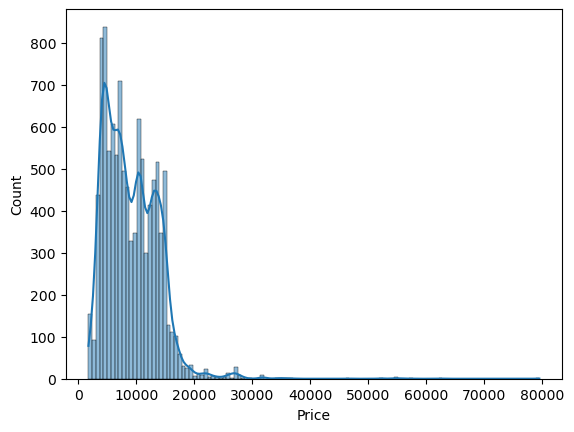

In [9]:
sns.histplot(df['Price'], kde=True)

In [10]:
########################################################################################################################
# Ans 03:

In [11]:
print('The Price of tickets ranges from Rs.', df['Price'].min(), '/- to Rs.' , df['Price'].max(),'/-.')

The Price of tickets ranges from Rs. 1759 /- to Rs. 79512 /-.


In [12]:
########################################################################################################################
# Ans 04:

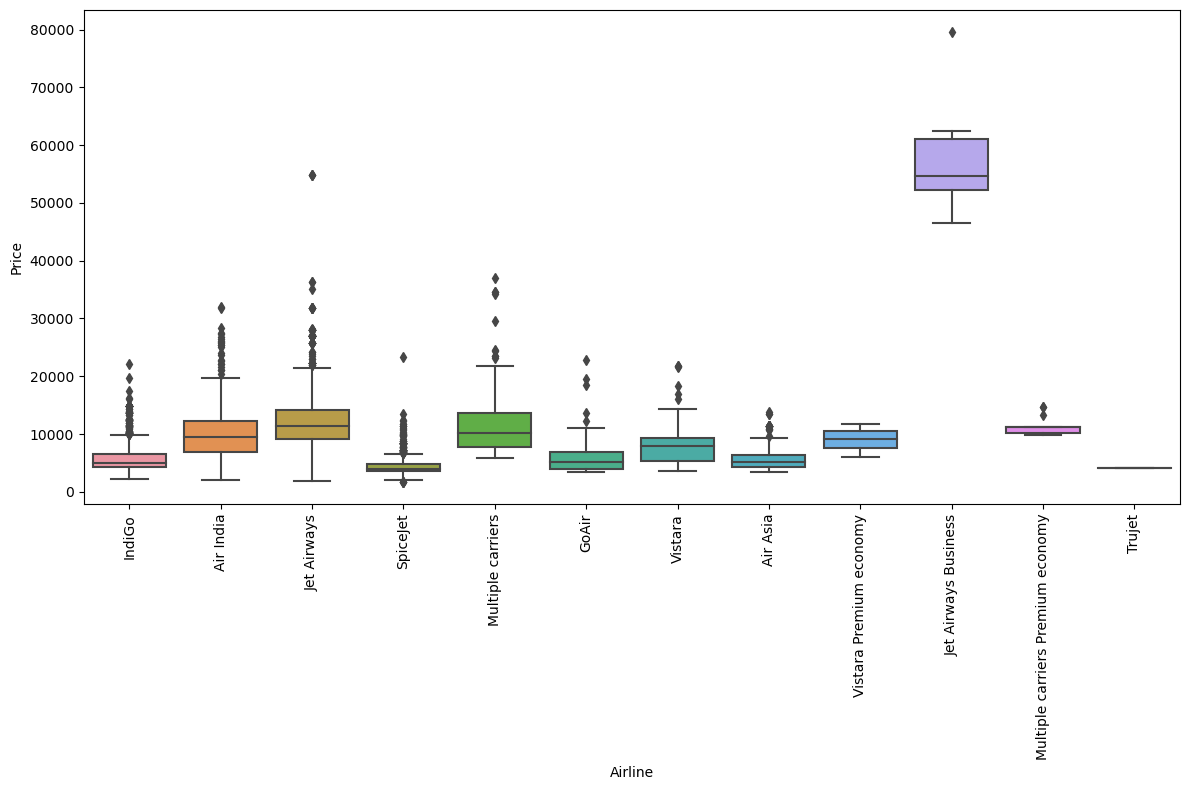

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
########################################################################################################################
# Ans 05:

In [16]:
# At last

In [17]:
########################################################################################################################
# Ans 06:

In [18]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [19]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [20]:
df['Month'].value_counts()

Month
5    3466
6    3414
3    2724
4    1079
Name: count, dtype: int64

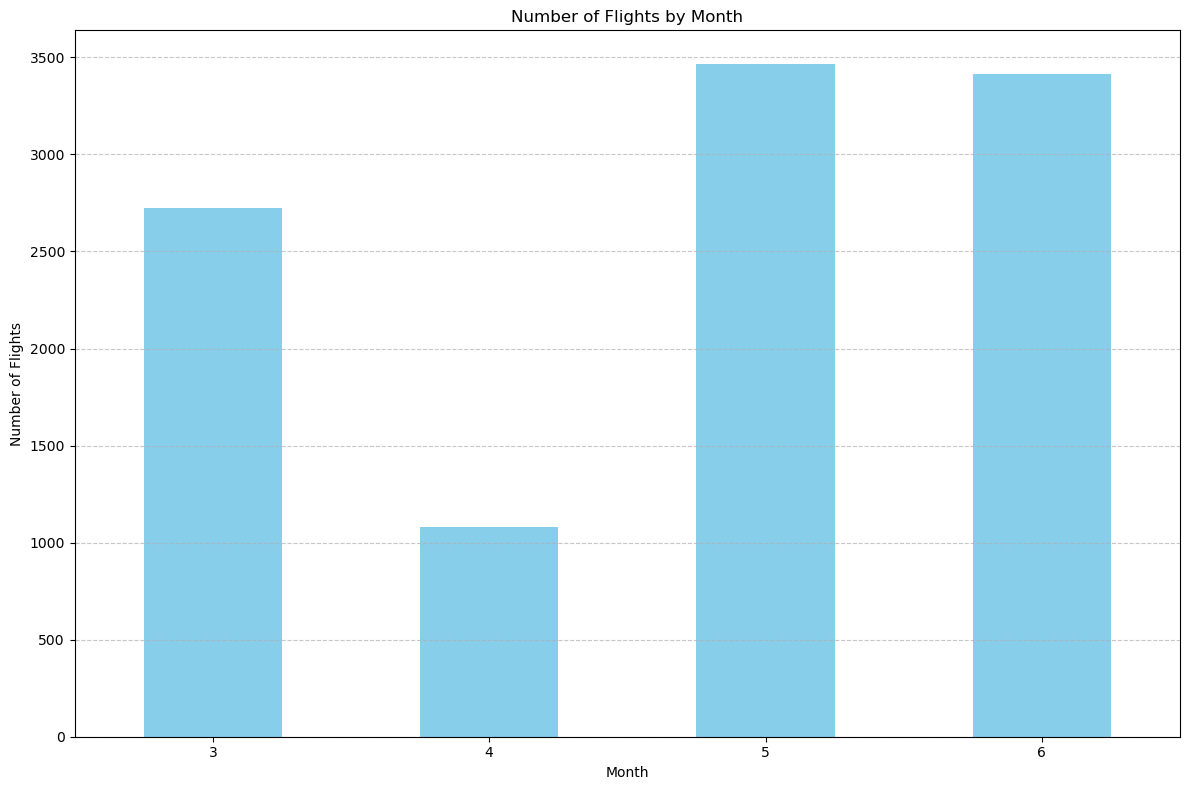

In [21]:
flights_by_month = df.groupby('Month').size()

plt.figure(figsize=(12, 8))
flights_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
# From the dateset available, peak travel month is May and June.
# I would present the data regarding peak travel season with a bar graph containing total number of flights by month

In [23]:
########################################################################################################################
# Ans 07:

In [24]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

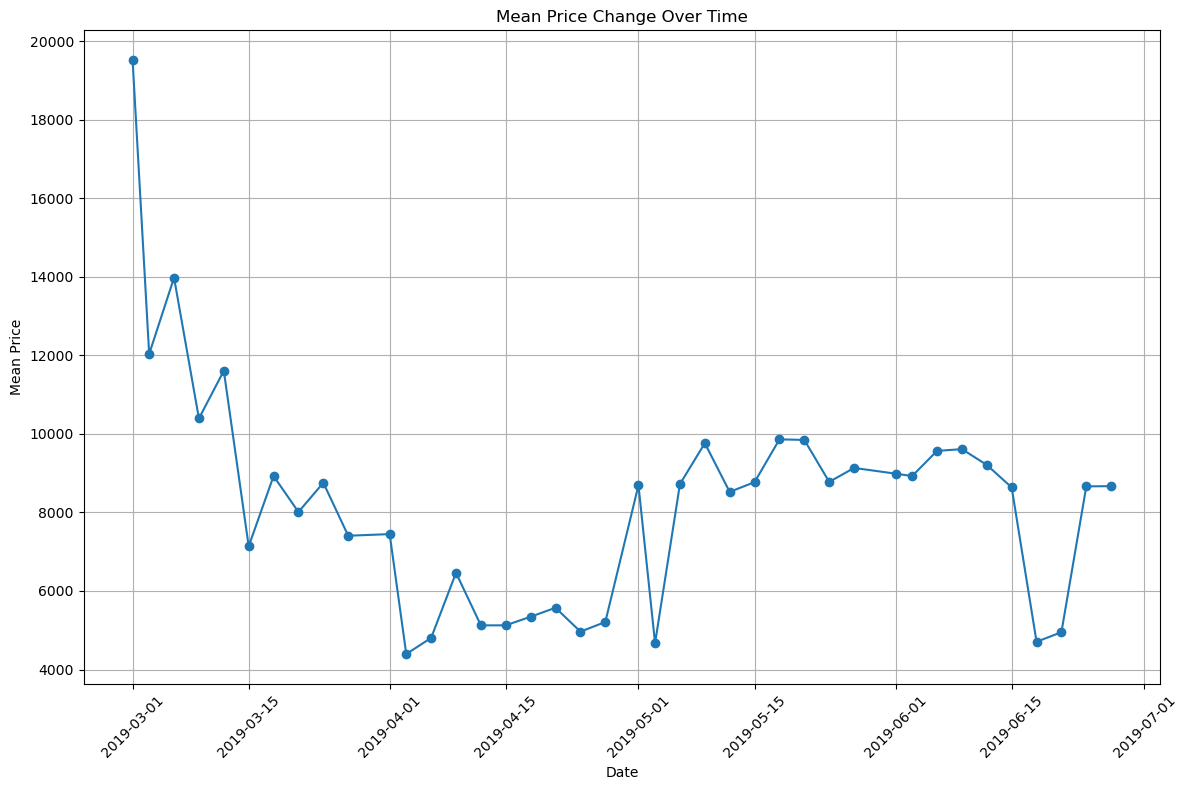

In [25]:
mean_prices = df.groupby('Date_of_Journey')['Price'].mean()

plt.figure(figsize=(12,8))
plt.plot(mean_prices.index, mean_prices.values, marker='o', linestyle='-')
plt.title('Mean Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
########################################################################################################################
# Ans 08:

In [27]:
df['Arr_Hr'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arr_Mn'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df['Arr_Hr'] = df['Arr_Hr'].astype(int)
df['Arr_Mn'] = df['Arr_Mn'].astype(int)

df['Dep_Hr'] = df['Dep_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Dep_Mn'] = df['Dep_Time'].str.split(' ').str[0].str.split(':').str[1]
df['Dep_Hr'] = df['Dep_Hr'].astype(int)
df['Dep_Mn'] = df['Dep_Mn'].astype(int)

In [28]:
df.drop(['Arrival_Time', 'Dep_Time', 'Additional_Info', 'Route'], axis=1, inplace=True)

In [29]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arr_Hr,Arr_Mn,Dep_Hr,Dep_Mn
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,19h,2 stops,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,2019,21,35,16,50


In [30]:
d = {
    '1 stop': 1,
    'non-stop': 0,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

In [31]:
df['Total_Stops'] = df['Total_Stops'].replace(d)

In [32]:
df['Duration_H'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_M'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [33]:
df['Duration_H'].replace('5m', np.nan, inplace=True)
df['Duration_H'].replace(np.nan, df['Duration_H'].mode()[0], inplace=True)
df['Duration_M'].replace(np.nan, df['Duration_M'].mode()[0], inplace=True)
df['Duration_H'] = df['Duration_H'].astype(int)
df['Duration_M'] = df['Duration_M'].astype(int)

In [34]:
df['Duration'] = (df['Duration_H'] * 60) + df['Duration_M']

In [35]:
df.drop(['Duration_H', 'Duration_M'], axis=1, inplace=True)

In [36]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arr_Hr,Arr_Mn,Dep_Hr,Dep_Mn
0,IndiGo,2019-03-24,Banglore,New Delhi,170,0.0,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,445,2.0,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,1170,2.0,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,325,1.0,6218,12,5,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,285,1.0,13302,1,3,2019,21,35,16,50


In [37]:
df[['Date_of_Journey', 'Duration', 'Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arr_Hr', 'Arr_Mn', 'Dep_Hr', 'Dep_Mn']].corr()['Price'].sort_values()

Date              -0.153738
Date_of_Journey   -0.138452
Month             -0.103651
Arr_Mn            -0.086155
Dep_Mn            -0.024492
Dep_Hr             0.006819
Arr_Hr             0.024264
Duration           0.507133
Total_Stops        0.603897
Price              1.000000
Year                    NaN
Name: Price, dtype: float64

In [38]:
# The prices of flights are highest influenced by:
# 1. Total Stops
# 2. Duration
# 3. Arrival Hour

# Note: Prices are affected by 'Airline' as well as seen in graph in answer no. 4.

In [39]:
########################################################################################################################
# Ans 05:

In [51]:
#We first check for outliers for the most important factors affecting Price i.e Total Stops, Duration and Arrival Hour.

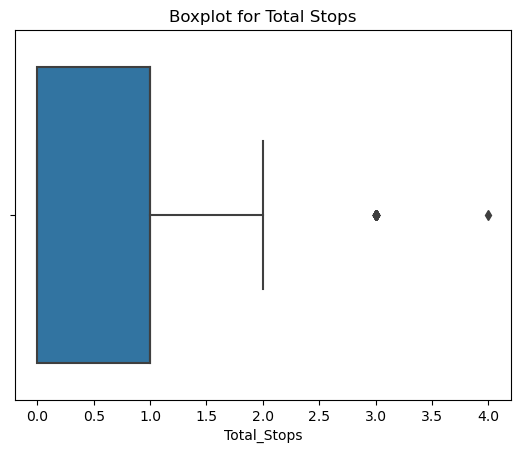

In [52]:
sns.boxplot(x='Total_Stops', data=df)
plt.title(f'Boxplot for Total Stops')
plt.show()

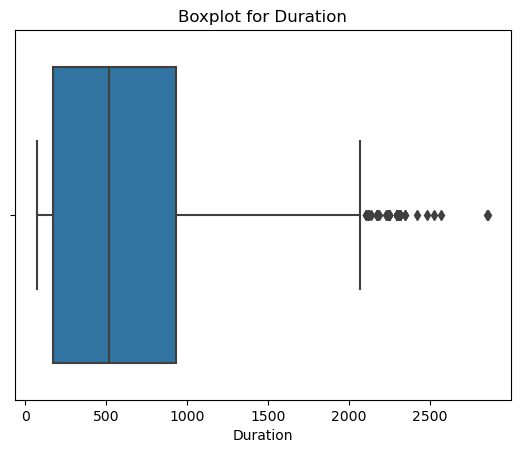

In [53]:
sns.boxplot(x='Duration', data=df)
plt.title(f'Boxplot for Duration')
plt.show()

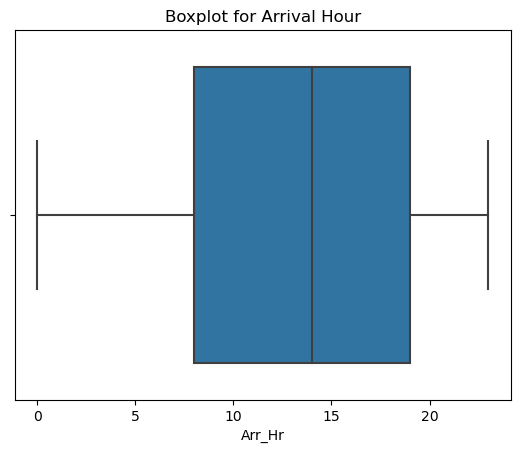

In [54]:
sns.boxplot(x='Arr_Hr', data=df)
plt.title(f'Boxplot for Arrival Hour')
plt.show()

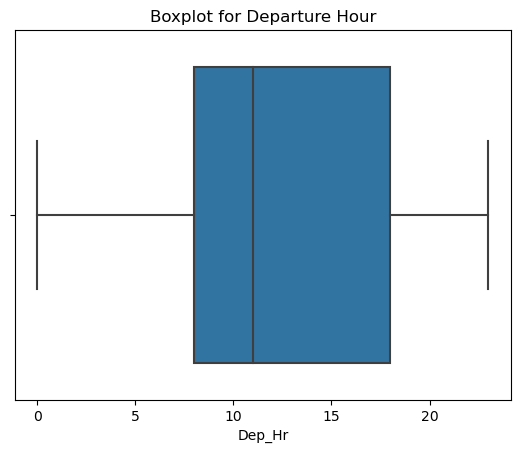

In [55]:
sns.boxplot(x='Dep_Hr', data=df)
plt.title(f'Boxplot for Departure Hour')
plt.show()

In [56]:
# We see some outliers for Total Stops and Duration and this can cause trouble while creating models to predict prices of flights.
# We can however exclude those rows or replace those values with mean, mode and/or median values while preparing data for machine learning.

In [57]:
########################################################################################################################

### Google PlayStore Data Missing/Not found